In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [58]:
df = pd.read_csv("data/donors.csv")
df.head()

,donor_id,age,gender,blood_group,region,last_donation_date,donation_count,days_since_last,willing,eligible,availability
0,1,24,Female,B+,Hyderabad,2024-10-07,5,273,0,1,0
1,2,53,Female,A+,Hyderabad,2025-05-10,6,58,0,0,0
2,3,54,Female,A-,Bangalore,2024-11-10,12,239,1,1,1
3,4,25,Female,B+,Chennai,2025-02-28,15,129,0,1,0
4,5,30,Female,O-,Mumbai,2025-04-26,13,72,1,0,0


In [59]:
f"Number of Unavailable Donors: {int((df['availability'].value_counts())[0])}"

'Number of Unavailable Donors: 580'

In [60]:
f"Number of Available Donors: {df['availability'].sum()}"

'Number of Available Donors: 420'

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   donor_id            1000 non-null   int64 
 1   age                 1000 non-null   int64 
 2   gender              1000 non-null   object
 3   blood_group         1000 non-null   object
 4   region              1000 non-null   object
 5   last_donation_date  1000 non-null   object
 6   donation_count      1000 non-null   int64 
 7   days_since_last     1000 non-null   int64 
 8   willing             1000 non-null   int64 
 9   eligible            1000 non-null   int64 
 10  availability        1000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 86.1+ KB


In [62]:
df.describe()

,donor_id,age,donation_count,days_since_last,willing,eligible,availability
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,39.603000,8.149000,191.820000,0.547000,0.79200,0.420000
std,288.819436,12.323119,4.332617,104.253424,0.498035,0.40608,0.493805
min,1.000000,18.000000,1.000000,10.000000,0.000000,0.00000,0.000000
25%,250.750000,29.000000,4.000000,103.000000,0.000000,1.00000,0.000000
50%,500.500000,40.000000,8.000000,194.000000,1.000000,1.00000,0.000000
75%,750.250000,50.000000,12.000000,285.000000,1.000000,1.00000,1.000000
max,1000.000000,60.000000,15.000000,365.000000,1.000000,1.00000,1.000000


In [63]:
# x -> region + last donation date
# y -> availablity

donor_id = df["donor_id"]
eligibility = df["eligible"]
availablity = df["availability"]
gender = df["gender"]
region = df["region"]
last_donation_date = df["last_donation_date"]
blood_group = df["blood_group"]
donation_count = df["donation_count"]
willing_rate = df["willing"]
days_since_last = df["days_since_last"]

In [64]:
x = pd.get_dummies(df[['region', 'days_since_last', 'willing']], drop_first=True)
y = df["availability"]

In [65]:
x, y

(     days_since_last  willing  region_Chennai  region_Delhi  region_Hyderabad  \
 0                273        0           False         False              True   
 1                 58        0           False         False              True   
 2                239        1           False         False             False   
 3                129        0            True         False             False   
 4                 72        1           False         False             False   
 ..               ...      ...             ...           ...               ...   
 995               41        1            True         False             False   
 996              118        0            True         False             False   
 997              205        1           False         False              True   
 998               57        0           False         False             False   
 999               97        0           False         False              True   
 
      region_M

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [67]:
y_pred = model.predict(x_test)

print(f"Accuracy:",{accuracy_score(y_test, y_pred)})
print(classification_report(y_test, y_pred))

Accuracy: {0.99}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       1.00      0.98      0.99        90

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [68]:
coeffs = pd.Series(model.coef_[0], index=x.columns)
print(coeffs.sort_values())

region_Hyderabad   -0.265775
region_Chennai     -0.138120
region_Mumbai      -0.055878
region_Delhi       -0.032974
days_since_last     0.027330
willing             9.003893
dtype: float64


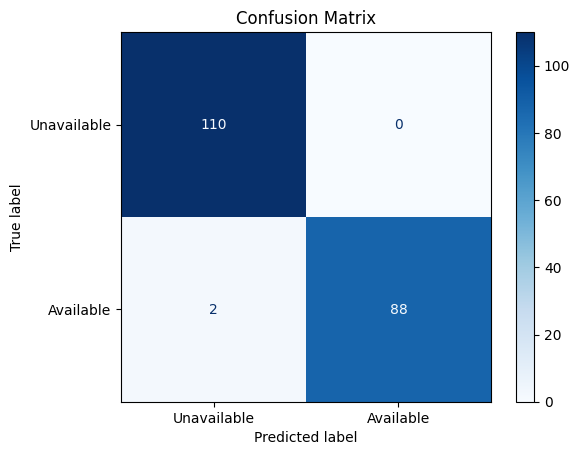

In [69]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Unavailable", "Available"])
conf_mat_disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

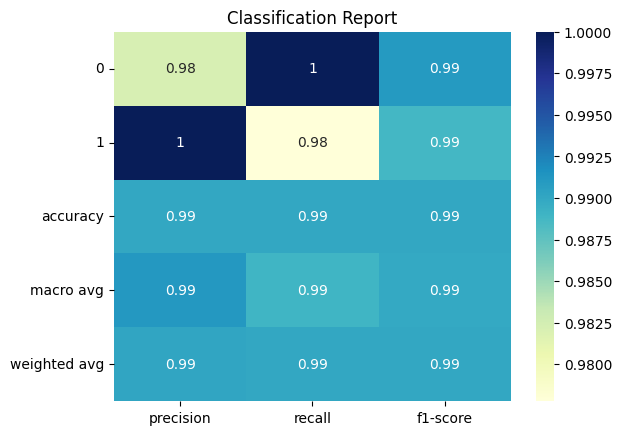

In [70]:
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title("Classification Report")
plt.show()

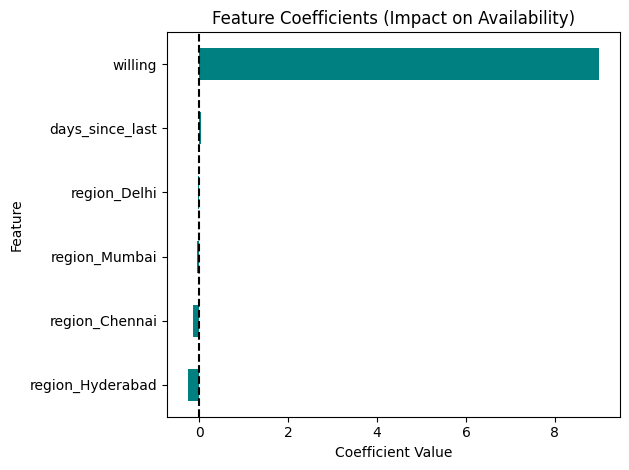

In [71]:
coefficients = pd.Series(model.coef_[0], index=x.columns)
coefficients.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Coefficients (Impact on Availability)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

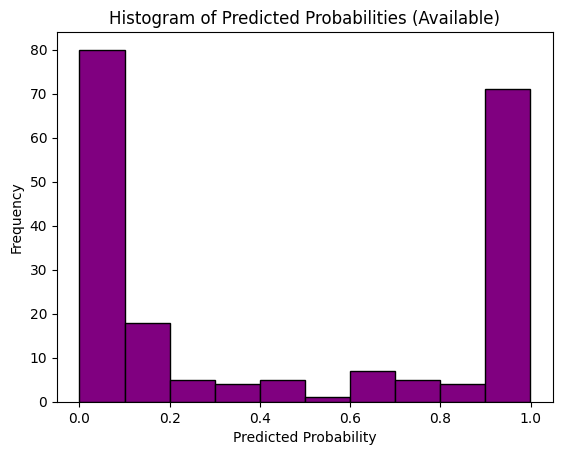

In [72]:
y_probs = model.predict_proba(x_test)[:, 1]

plt.hist(y_probs, bins=10, color='purple', edgecolor='black')
plt.title("Histogram of Predicted Probabilities (Available)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

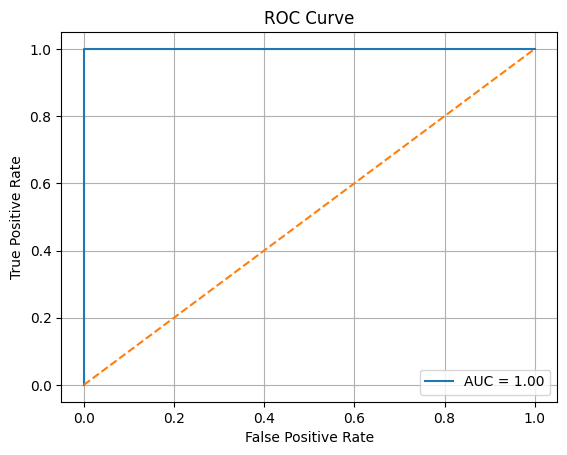

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()